In [16]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from mtr.file_stream import FileStream
from mtr.sequential_evaluator import SequentialEvaluator

In [2]:
# Read the data
data = pd.read_csv('../Data/all_stocks_5yr.csv')
data.head(5)

,Date,Open,High,Low,Close,Volume,Name
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM


### All the actives

In [3]:
# All actives
' '.join(np.unique(data.loc[:, 'Name']).tolist())

'A AAL AAP AAPL ABBV ABC ABT ACN ADBE ADI ADM ADP ADS ADSK AEE AEP AES AET AFL AGN AIG AIV AIZ AJG AKAM ALB ALGN ALK ALL ALLE ALXN AMAT AMD AME AMG AMGN AMP AMZN ANDV ANSS ANTM AON AOS APA APC APD APH ARE ARNC ATVI AVB AVGO AVY AWK AXP AYI AZO BA BAC BAX BBT BBY BCR BDX BEN BF.B BHF BHGE BIIB BK BLK BLL BMY BRK.B BSX BWA BXP C CA CAG CAH CAT CB CBG CBOE CBS CCI CCL CELG CERN CF CFG CHD CHK CHRW CHTR CI CINF CL CLX CMA CMCSA CME CMG CMI CMS CNC CNP COF COG COH COL COO COP COST COTY CPB CRM CSCO CSRA CSX CTAS CTL CTSH CTXS CVS CVX CXO D DAL DD DE DFS DG DGX DHI DHR DIS DISCA DISCK DISH DLPH DLR DLTR DOV DOW DPS DRE DRI DTE DUK DVA DVN DXC EA EBAY ECL ED EFX EIX EL EMN EMR EOG EQIX EQR EQT ES ESRX ESS ETFC ETN ETR EVHC EW EXC EXPD EXPE EXR F FAST FB FBHS FCX FDX FE FFIV FIS FISV FITB FL FLIR FLR FLS FMC FOX FOXA FRT FTI FTV GD GE GGP GILD GIS GLW GM GOOG GOOGL GPC GPN GPS GRMN GS GT GWW HAL HAS HBAN HBI HCA HCN HCP HD HES HIG HLT HOG HOLX HON HP HPE HPQ HRB HRL HRS HSIC HST HSY HUM IBM IC

### Now I'm going to select 3 random actives and subset them to apply the windowed MTR strategy

In [4]:
select_actv = ['MMM', 'MS', 'SRE']
n_actives = len(select_actv)

s_data = data[data['Name'].isin(select_actv)]

### Counting the amount of examples for each active
#### All the data

In [5]:
[(name, val) for name, val in  data.Name.value_counts().iteritems()][0:10]

[('MSI', 1258),
 ('BAX', 1258),
 ('CTL', 1258),
 ('PNW', 1258),
 ('WYNN', 1258),
 ('DRI', 1258),
 ('AJG', 1258),
 ('GE', 1258),
 ('BSX', 1258),
 ('PSX', 1258)]

#### Only the filtered data (actives with the same number of examples were selected)

In [6]:
actv_counts = [(name, val) for name, val in  s_data.Name.value_counts().iteritems()]
actv_counts

[('MMM', 1258), ('SRE', 1258), ('MS', 1258)]

#### Transforming subset data into a FileStream

In [7]:
d = {k: s_data[s_data['Name'] == k].loc[:, 'Close'].values for k, _ in actv_counts}
df = pd.DataFrame(d)
df.head()

,MMM,SRE,MS
0,92.40,68.60,14.55
1,92.30,69.33,14.39
2,92.54,69.29,14.58
3,93.74,68.92,14.59
4,94.24,68.74,14.59


In [8]:
fs = FileStream(data=df)
se = SequentialEvaluator(
    file_stream=fs,
    n_actives=n_actives,
    regressor=RandomForestRegressor,
    regressor_params={'n_estimators': 100, 'n_jobs': 6}
)


In [9]:
predictions = se.fit_predict()

In [10]:
predictions

array([[115.2785,  84.2193,  26.6836],
       [115.551 ,  84.3499,  26.9188],
       [115.43  ,  84.5257,  26.8758],
       ...,
       [176.0788, 102.2025,  42.6308],
       [177.3362, 101.8691,  42.5749],
       [178.4731, 101.418 ,  42.5291]])

In [13]:
# pred_dates = se.get_predicted_dates()
pred_dates = se._psf.predicted_dates()

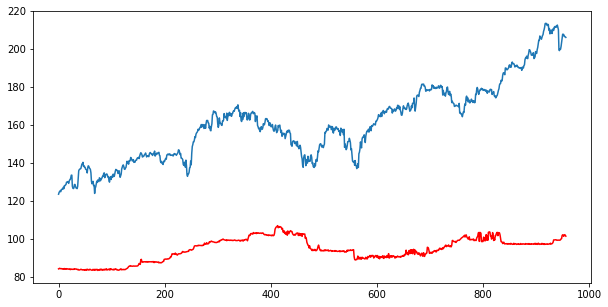

In [27]:
plt.figure(figsize=(10,5))
plt.plot(df.loc[301:, select_actv[0]].values)
plt.plot(predictions[:, 1], c='r')
plt.show()